In [ ]:
from datasets import load_dataset
dataset = load_dataset("animesh/autonlp-data-peptides", split='validation[:10%]')

# Main datasets API

This notebook is a quick dive in the main user API for loading datasets in `datasets`

In [ ]:
# install datasets
!pip install datasets
# Make sure that we have a recent version of pyarrow in the session before we continue - otherwise reboot Colab to activate it
import pyarrow
if int(pyarrow.__version__.split('.')[1]) < 16 and int(pyarrow.__version__.split('.')[0]) == 0:
    import os
    os.kill(os.getpid(), 9)

In [ ]:
# Let's import the library. We typically only need at most four methods:
from datasets import list_datasets, list_metrics, load_dataset, load_metric
from pprint import pprint

## Listing the currently available datasets and metrics

In [ ]:
# Currently available datasets and metrics
datasets = list_datasets()
metrics = list_metrics()
print(f"🤩 Currently {len(datasets)} datasets are available on the hub:")
pprint(datasets, compact=True)
print(f"🤩 Currently {len(metrics)} metrics are available on the hub:")
pprint(metrics, compact=True)

🤩 Currently 1639 datasets are available on the hub:
['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc',
 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue',
 'ajgt_twitter_ar', 'allegro_reviews', 'allocine', 'alt', 'amazon_polarity',
 'amazon_reviews_multi', 'amazon_us_reviews', 'ambig_qa', 'ami', 'amttl',
 'anli', 'app_reviews', 'aqua_rat', 'aquamuse', 'ar_cov19', 'ar_res_reviews',
 'ar_sarcasm', 'arabic_billion_words', 'arabic_pos_dialect',
 'arabic_speech_corpus', 'arcd', 'arsentd_lev', 'art', 'arxiv_dataset',
 'ascent_kb', 'aslg_pc12', 'asnq', 'asset', 'assin', 'assin2', 'atomic',
 'autshumato', 'babi_qa', 'banking77', 'bbaw_egyptian', 'bbc_hindi_nli',
 'bc2gm_corpus', 'beans', 'best2009', 'bianet', 'bible_para', 'big_patent',
 'billsum', 'bing_coronavirus_query_set', 'biomrc', 'biosses',
 'blended_skill_talk', 'blimp', 'blog_authorship_corpus', 'bn_hate_speech',
 'bookcorpus', 'bookcorpusopen', 'boolq', 'bprec', 'break_data', 'brwac',
 'bsd_ja_en', 'bs

In [ ]:
# You can access various attributes of the datasets before downloading them
peptide_dataset = list_datasets(with_details=True)[datasets.index('animesh/autonlp-data-peptides')]
pprint(peptide_dataset.__dict__)  # It's a simple python dataclass

{'author': 'animesh',
 'citation': None,
 'description': None,
 'etag': None,
 'id': 'animesh/autonlp-data-peptides',
 'key': '',
 'lastModified': None,
 'private': False,
 'siblings': None,
 'size': None,
 'tags': []}


## An example with peptide

In [ ]:
# Downloading and loading a dataset
#dataset = load_dataset('animesh/autonlp-data-peptides', split='validation[:10%]')
dataset = load_dataset('animesh/autonlp-data-peptides', split='train')

Using custom data configuration autonlp-data-peptides-74c0524bb84d4582
Reusing dataset csv (/root/.cache/huggingface/datasets/csv/autonlp-data-peptides-74c0524bb84d4582/0.0.0/9144e0a4e8435090117cea53e6c7537173ef2304525df4a077c435d8ee7828ff)


In [ ]:
dataset.column_names

['Sequence ', ' CCS']

In [ ]:
dataset[' CCS']

[570.788572478197,
 1026.6807572233301,
 839.503217885291,
 852.281029004907,
 1026.6804912517,
 872.346354908432,
 1034.00567612134,
 411.39906091453497,
 419.912246802515,
 406.736957107841,
 562.4054441837741,
 568.506691059742,
 702.202883420114,
 569.7270872871791,
 367.525983756782,
 449.632283509317,
 355.94918323976196,
 387.19108124027997,
 592.579794028757,
 500.51560669093203,
 505.42096249207196,
 509.100148453102,
 511.551313642627,
 567.103122125231,
 586.4497205414141,
 586.449403186838,
 588.8842142098,
 591.319488010213,
 637.26172359447,
 591.319145834745,
 637.26177586591,
 359.02482092230906,
 234.22104420135,
 357.77665490662,
 512.0184495685791,
 510.79146454988296,
 504.65507636988195,
 500.972723633638,
 488.93553235741206,
 416.038975992315,
 724.8354279008321,
 732.181346088013,
 870.779168968937,
 532.88541648185,
 435.787867656015,
 437.024352015342,
 444.45781373474006,
 449.38689832356596,
 445.689652669331,
 388.84802861082903,
 697.9607404479401,
 457.23

This call to `datasets.load_dataset()` does the following steps under the hood:

1. Download and import in the library the **peptide python processing script** from HuggingFace AWS bucket if it's not already stored in the library. You can find the peptide processing script [here](https://github.com/huggingface/datasets/tree/master/datasets/peptide/peptide.py) for instance.

   Processing scripts are small python scripts which define the info (citation, description) and format of the dataset and contain the URL to the original peptide JSON files and the code to load examples from the original peptide JSON files.


2. Run the peptide python processing script which will:
    - **Download the peptide dataset** from the original URL (see the script) if it's not already downloaded and cached.
    - **Process and cache** all peptide in a structured Arrow table for each standard splits stored on the drive.

      Arrow table are arbitrarily long tables, typed with types that can be mapped to numpy/pandas/python standard types and can store nested objects. They can be directly access from drive, loaded in RAM or even streamed over the web.
    

3. Return a **dataset built from the splits** asked by the user (default: all); in the above example we create a dataset with the first 10% of the validation split.

In [ ]:
# Informations on the dataset (description, citation, size, splits, format...)
# are provided in `dataset.info` (a simple python dataclass) and also as direct attributes in the dataset object
pprint(dataset.info.__dict__)

{'builder_name': 'csv',
 'citation': '',
 'config_name': 'autonlp-data-peptides',
 'dataset_size': 10311068,
 'description': '',
 'download_checksums': {'raw/pepCCS.csv': {'checksum': '67c16403848f0adb85066ee4697bd4be4918e89d113f2027093f90899c2ab9ad',
                                           'num_bytes': 12736697}},
 'download_size': 12736697,
 'features': {' CCS': Value(dtype='float64', id=None),
              'Sequence ': Value(dtype='string', id=None)},
 'homepage': '',
 'license': '',
 'post_processed': None,
 'post_processing_size': None,
 'size_in_bytes': 23047765,
 'splits': {'train': SplitInfo(name='train', num_bytes=10311068, num_examples=352110, dataset_name='csv')},
 'supervised_keys': None,
 'task_templates': None,
 'version': 0.0.0}


## Inspecting and using the dataset: elements, slices and columns

The returned `Dataset` object is a memory mapped dataset that behave similarly to a normal map-style dataset. It is backed by an Apache Arrow table which allows many interesting features.

In [ ]:
print(dataset)

Dataset({
    features: ['Sequence ', ' CCS'],
    num_rows: 352110
})


You can query it's length and get items or slices like you would do normally with a python mapping.

In [ ]:
print(f"Dataset len(dataset): {len(dataset)}")

Dataset len(dataset): 352110


In [ ]:
# Or get slices with several examples:
print("\n👉Slice of the two items 'dataset[10:12]':")
pprint(dataset[10:12])


👉Slice of the two items 'dataset[10:12]':
{' CCS': [562.4054441837741, 568.506691059742],
 'Sequence ': ['AAAAAAAAAPAAAATAPTTAATTAATAAQ ',
               'AAAAAAAAAPAAAATAPTTAATTAATAAQ ']}


The `__getitem__` method will return different format depending on the type of query:

- Items like `dataset[0]` are returned as dict of elements.
- Slices like `dataset[10:20]` are returned as dict of lists of elements.
- Columns like `dataset['question']` are returned as a list of elements.

This may seems surprising at first but in our experiments it's actually a lot easier to use for data processing than returning the same format for each of these views on the dataset.

In particular, you can easily iterate along columns in slices, and also naturally permute consecutive indexings with identical results as showed here by permuting column indexing with elements and slices:

### Dataset are internally typed and structured

The dataset is backed by one (or several) Apache Arrow tables which are typed and allows for fast retrieval and access as well as arbitrary-size memory mapping.

This means respectively that the format for the dataset is clearly defined and that you can load datasets of arbitrary size without worrying about RAM memory limitation (basically the dataset take no space in RAM, it's directly read from drive when needed with fast IO access).

In [ ]:
# You can inspect the dataset column names and types 
print("Column names:")
pprint(dataset.column_names)
print("Features:")
pprint(dataset.features)

Column names:
['answers', 'context', 'id', 'question', 'title']
Features:
{'answers': Sequence(feature={'text': Value(dtype='string', id=None), 'answer_start': Value(dtype='int32', id=None)}, length=-1, id=None),
 'context': Value(dtype='string', id=None),
 'id': Value(dtype='string', id=None),
 'question': Value(dtype='string', id=None),
 'title': Value(dtype='string', id=None)}


### Additional misc properties

In [ ]:
# Datasets also have shapes informations
print("The number of rows", dataset.num_rows, "also available as len(dataset)", len(dataset))
print("The number of columns", dataset.num_columns)
print("The shape (rows, columns)", dataset.shape)

The number of rows 1057 also available as len(dataset) 1057
The number of columns 5
The shape (rows, columns) (1057, 5)


## Modifying the dataset with `dataset.map`

Now that we know how to inspect our dataset we also want to update it. For that there is a powerful method `.map()` which is inspired by `tf.data` map method and that you can use to apply a function to each examples, independently or in batch.

`.map()` takes a callable accepting a dict as argument (same dict as the one returned by `dataset[i]`) and iterate over the dataset by calling the function on each example.

In [ ]:
# Let's print the length of each `context` string in our subset of the dataset
# (10% of the validation i.e. 1057 examples)

dataset.map(lambda example: print(len(example['Sequence ']), end=','))

  0%|          | 0/352110 [00:00<?, ?ex/s]

23,53,53,53,53,53,53,17,17,17,30,30,30,30,13,19,15,15,29,26,26,26,26,26,27,27,27,27,27,27,27,12,12,12,22,22,22,22,22,15,36,36,36,29,16,16,21,21,21,13,26,18,18,18,15,25,25,25,13,16,16,16,16,14,14,14,14,14,18,18,22,18,18,15,15,15,15,15,18,18,18,18,18,18,18,18,16,25,25,25,25,25,26,26,12,28,28,28,28,28,44,13,29,32,16,16,18,18,18,33,33,14,18,18,18,15,15,15,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,41,41,14,17,17,25,25,25,25,25,25,25,25,18,20,20,11,11,14,21,21,21,21,22,22,25,21,21,21,21,21,26,26,26,26,16,16,12,19,19,19,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,18,18,11,11,11,11,12,12,26,26,26,26,26,26,26,21,21,22,22,22,22,24,24,24,20,20,20,13,13,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,17,15,21,21,21,21,26,15,15,15,15,15,15,15,49,49,49,20,20,20,20,20,16,16,16,16,16,18,18,18,18,18,18,14,14,14,14,20,19,19,19,25,25,25,25,25,25,17,17,17,17,21,21,21,13,12,12,20,26,26,26,26,26,26,26,26,26,26,26,13,13,13,13,13,13,13,15,15,23,23,23,23,23,2

Dataset({
    features: ['Sequence ', ' CCS'],
    num_rows: 352110
})

(array([   318.,    603.,   4820.,  63931., 115074., 104002.,  43039.,
         14637.,   4929.,    757.]),
 array([ 7.66028875,  7.90582657,  8.15136439,  8.39690221,  8.64244003,
         8.88797785,  9.13351567,  9.37905349,  9.62459131,  9.87012912,
        10.11566694]),
 <a list of 10 Patch objects>)

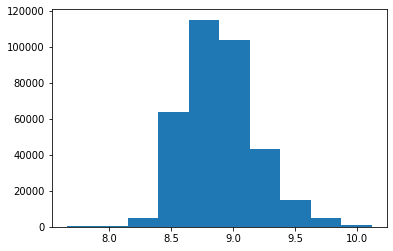

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#plt.theme('dark')
plt.hist(np.log2(dataset[' CCS']))

The above examples was a bit verbose. We can control the logging level of 🤗 Datasets with it's logging module:


In [ ]:
# Let's keep it verbose for our tutorial though
from datasets import logging
logging.set_verbosity_info()

The above example had no effect on the dataset because the method we supplied to `.map()` didn't return a `dict` or a `abc.Mapping` that could be used to update the examples in the dataset.

In such a case, `.map()` will return the same dataset (`self`).

Now let's see how we can use a method that actually modify the dataset.

### Modifying the dataset example by example

The main interest of `.map()` is to update and modify the content of the table and leverage smart caching and fast backend.

To use `.map()` to update elements in the table you need to provide a function with the following signature: `function(example: dict) -> dict`.

In [ ]:
# Let's add a prefix 'My cute title: ' to each of our titles

def add_prefix_to_title(example):
    example['title'] = 'My cute title: ' + example['title']
    return example

prefixed_dataset = dataset.map(add_prefix_to_title)

print(prefixed_dataset.unique('title'))  # `.unique()` is a super fast way to print the unique elemnts in a column (see the doc for all the methods)

Testing the mapped function outputs
Testing finished, running the mapping function on the dataset
Loading cached processed dataset at /root/.cache/huggingface/datasets/squad/plain_text/1.0.0/1244d044b266a5e4dbd4174d23cb995eead372fbca31a03edc3f8a132787af41/cache-a5a4b682b7640362.arrow


['My cute title: Super_Bowl_50', 'My cute title: Warsaw']


This call to `.map()` compute and return the updated table. It will also store the updated table in a cache file indexed by the current state and the mapped function.

A subsequent call to `.map()` (even in another python session) will reuse the cached file instead of recomputing the operation.

You can test this by running again the previous cell, you will see that the result are directly loaded from the cache and not re-computed again.

The updated dataset returned by `.map()` is (again) directly memory mapped from drive and not allocated in RAM.

The function you provide to `.map()` should accept an input with the format of an item of the dataset: `function(dataset[0])` and return a python dict.

The columns and type of the outputs can be different than the input dict. In this case the new keys will be added as additional columns in the dataset.

Bascially each dataset example dict is updated with the dictionary returned by the function like this: `example.update(function(example))`.

In [ ]:
# Since the input example dict is updated with our function output dict,
# we can actually just return the updated 'title' field
titled_dataset = dataset.map(lambda example: {'title': 'My cutest title: ' + example['title']})

print(titled_dataset.unique('title'))

Testing the mapped function outputs
Testing finished, running the mapping function on the dataset
Loading cached processed dataset at /root/.cache/huggingface/datasets/squad/plain_text/1.0.0/1244d044b266a5e4dbd4174d23cb995eead372fbca31a03edc3f8a132787af41/cache-21992d783228fab5.arrow


['My cutest title: Super_Bowl_50', 'My cutest title: Warsaw']


#### Removing columns
You can also remove columns when running map with the `remove_columns=List[str]` argument.

In [ ]:
# This will remove the 'title' column while doing the update (after having send it the the mapped function so you can use it in your function!)
less_columns_dataset = dataset.map(lambda example: {'new_title': 'Wouhahh: ' + example['title']}, remove_columns=['title'])

print(less_columns_dataset.column_names)
print(less_columns_dataset.unique('new_title'))

Testing the mapped function outputs
Testing finished, running the mapping function on the dataset
Loading cached processed dataset at /root/.cache/huggingface/datasets/squad/plain_text/1.0.0/1244d044b266a5e4dbd4174d23cb995eead372fbca31a03edc3f8a132787af41/cache-13610b40800136cb.arrow


['answers', 'context', 'id', 'new_title', 'question']
['Wouhahh: Super_Bowl_50', 'Wouhahh: Warsaw']


#### Using examples indices
With `with_indices=True`, dataset indices (from `0` to `len(dataset)`) will be supplied to the function which must thus have the following signature: `function(example: dict, indice: int) -> dict`

In [ ]:
# This will add the index in the dataset to the 'question' field
with_indices_dataset = dataset.map(lambda example, idx: {'question': f'{idx}: ' + example['question']},
                                   with_indices=True)

pprint(with_indices_dataset['question'][:5])

Testing the mapped function outputs
Testing finished, running the mapping function on the dataset
Loading cached processed dataset at /root/.cache/huggingface/datasets/squad/plain_text/1.0.0/1244d044b266a5e4dbd4174d23cb995eead372fbca31a03edc3f8a132787af41/cache-c8fc174bebeb3456.arrow


['0: Which NFL team represented the AFC at Super Bowl 50?',
 '1: Which NFL team represented the NFC at Super Bowl 50?',
 '2: Where did Super Bowl 50 take place?',
 '3: Which NFL team won Super Bowl 50?',
 '4: What color was used to emphasize the 50th anniversary of the Super Bowl?']


### Modifying the dataset with batched updates

`.map()` can also work with batch of examples (slices of the dataset).

This is particularly interesting if you have a function that can handle batch of inputs like the tokenizers of HuggingFace `tokenizers`.

To work on batched inputs set `batched=True` when calling `.map()` and supply a function with the following signature: `function(examples: Dict[List]) -> Dict[List]` or, if you use indices, `function(examples: Dict[List], indices: List[int]) -> Dict[List]`).

Bascially, your function should accept an input with the format of a slice of the dataset: `function(dataset[:10])`.

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.9 MB 5.1 MB/s 
     |████████████████████████████████| 3.3 MB 46.3 MB/s 
     |████████████████████████████████| 636 kB 49.3 MB/s 
     |████████████████████████████████| 895 kB 43.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# Let's import a fast tokenizer that can work on batched inputs
# (the 'Fast' tokenizers in HuggingFace)
from transformers import BertTokenizerFast, logging as transformers_logging
transformers_logging.set_verbosity_warning()
tokenizer = BertTokenizerFast.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Now let's batch tokenize our dataset 'context'
encoded_dataset = dataset.map(lambda example: tokenizer(example['Sequence ']), batched=True)
#print("encoded_dataset[0]")
pprint(encoded_dataset[0], compact=True)

Loading cached processed dataset at /root/.cache/huggingface/datasets/csv/autonlp-data-peptides-74c0524bb84d4582/0.0.0/9144e0a4e8435090117cea53e6c7537173ef2304525df4a077c435d8ee7828ff/cache-f68280f89dcd3ded.arrow


{' CCS': 570.788572478197,
 'Sequence ': 'AAAAAAAAAAAAAAAGAGAGAK ',
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'input_ids': [101, 13807, 11189, 11189, 11189, 11189, 11189, 11189, 10583,
               10583, 10583, 2428, 102],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [ ]:
# we have added additional columns
pprint(encoded_dataset.column_names)

[' CCS', 'Sequence ', 'attention_mask', 'input_ids', 'token_type_ids']


In [ ]:
# Now our dataset comprise the labels for the start and end position
# as well as the offsets for converting back tokens
# in span of the original string for evaluation
print("column_names", encoded_dataset.column_names)
print("start_positions", encoded_dataset[:5])

column_names [' CCS', 'Sequence ', 'attention_mask', 'input_ids', 'token_type_ids']
start_positions {' CCS': [570.788572478197, 1026.6807572233301, 839.503217885291, 852.281029004907, 1026.6804912517], 'Sequence ': ['AAAAAAAAAAAAAAAGAGAGAK ', 'AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGPGAVGER ', 'AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGPGAVGER ', 'AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGPGAVGER ', 'AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGPGAVGER '], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], 'input_ids': [[101, 13807, 11189, 11189, 11189, 111

## formatting outputs for PyTorch, Tensorflow, Numpy, Pandas

Now that we have tokenized our inputs, we probably want to use this dataset in a `torch.Dataloader` or a `tf.data.Dataset`.

To be able to do this we need to tweak two things:

- format the indexing (`__getitem__`) to return numpy/pytorch/tensorflow tensors, instead of python objects, and probably
- format the indexing (`__getitem__`) to return only the subset of the columns that we need for our model inputs.

  We don't want the columns `id` or `title` as inputs to train our model, but we could still want to keep them in the dataset, for instance for the evaluation of the model.
    
This is handled by the `.set_format(type: Union[None, str], columns: Union[None, str, List[str]])` where:

- `type` define the return type for our dataset `__getitem__` method and is one of `[None, 'numpy', 'pandas', 'torch', 'tensorflow']` (`None` means return python objects), and
- `columns` define the columns returned by `__getitem__` and takes the name of a column in the dataset or a list of columns to return (`None` means return all columns).

In [ ]:
columns_to_return = ['input_ids', 'token_type_ids', 'attention_mask']
encoded_dataset.set_format(type='torch', columns=columns_to_return)
# Our dataset indexing output is now ready for being used in a pytorch dataloader
pprint(encoded_dataset[1], compact=True)

{'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'input_ids': tensor([  101, 13807, 11189, 11189, 11189, 11189, 13821,  2349, 12880, 22689,
         2101,  2349,  9159,  2349, 13472, 11680, 13472,  2036, 12152,  1592,
         4880, 10147,  2349, 15928, 17095,  1592,  2036,  2559, 17095, 10583,
         2559, 16523,  2069,   102]),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}


In [ ]:
# Note that the columns are not removed from the dataset, just not returned when calling __getitem__
# Similarly the inner type of the dataset is not changed to torch.Tensor, the conversion and filtering is done on-the-fly when querying the dataset
print(encoded_dataset.column_names)

[' CCS', 'Sequence ', 'attention_mask', 'input_ids', 'token_type_ids']


In [ ]:
# We can remove the formatting with `.reset_format()`
# or, identically, a call to `.set_format()` with no arguments
encoded_dataset.reset_format()
pprint(encoded_dataset[1], compact=True)

{' CCS': 1026.6807572233301,
 'Sequence ': 'AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGPGAVGER ',
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'input_ids': [101, 13807, 11189, 11189, 11189, 11189, 13821, 2349, 12880,
               22689, 2101, 2349, 9159, 2349, 13472, 11680, 13472, 2036, 12152,
               1592, 4880, 10147, 2349, 15928, 17095, 1592, 2036, 2559, 17095,
               10583, 2559, 16523, 2069, 102],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [ ]:
# The current format can be checked with `.format`,
# which is a dict of the type and formatting
pprint(encoded_dataset.format)

{'columns': [' CCS',
             'Sequence ',
             'attention_mask',
             'input_ids',
             'token_type_ids'],
 'format_kwargs': {},
 'output_all_columns': False,
 'type': None}


# Wrapping this all up (PyTorch)

Let's wrap this all up with the full code to load and prepare peptide for training a PyTorch model from HuggingFace `transformers` library.



In [ ]:
!pip install transformers

In [ ]:
import torch 
from datasets import load_dataset
from transformers import BertTokenizerFast

# Load our training dataset and tokenizer
dataset = load_dataset('peptide')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-cased')

def get_correct_alignement(context,  CCS):
    """ Some original examples in peptide have indices wrong by 1 or 2 character. We test and fix this here. """
    gold_text =  CCS['text'][0]
    start_idx =  CCS[' CCS_start'][0]
    end_idx = start_idx + len(gold_text)
    if context[start_idx:end_idx] == gold_text:
        return start_idx, end_idx       # When the gold label position is good
    elif context[start_idx-1:end_idx-1] == gold_text:
        return start_idx-1, end_idx-1   # When the gold label is off by one character
    elif context[start_idx-2:end_idx-2] == gold_text:
        return start_idx-2, end_idx-2   # When the gold label is off by two character
    else:
        raise ValueError()

# Tokenize our training dataset
def convert_to_features(example_batch):
    # Tokenize contexts and questions (as pairs of inputs)
    encodings = tokenizer(example_batch['context'], example_batch['question'], truncation=True)

    # Compute start and end tokens for labels using Transformers's fast tokenizers alignement methods.
    start_positions, end_positions = [], []
    for i, (context,  CCS) in enumerate(zip(example_batch['context'], example_batch[' CCSs'])):
        start_idx, end_idx = get_correct_alignement(context,  CCS)
        start_positions.append(encodings.char_to_token(i, start_idx))
        end_positions.append(encodings.char_to_token(i, end_idx-1))
    encodings.update({'start_positions': start_positions, 'end_positions': end_positions})
    return encodings

encoded_dataset = dataset.map(convert_to_features, batched=True)

# Format our dataset to outputs torch.Tensor to train a pytorch model
columns = ['input_ids', 'token_type_ids', 'attention_mask', 'start_positions', 'end_positions']
encoded_dataset.set_format(type='torch', columns=columns)

# Instantiate a PyTorch Dataloader around our dataset
# Let's do dynamic batching (pad on the fly with our own collate_fn)
def collate_fn(examples):
    return tokenizer.pad(examples, return_tensors='pt')
dataloader = torch.utils.data.DataLoader(encoded_dataset['train'], collate_fn=collate_fn, batch_size=8)

Checking /root/.cache/huggingface/datasets/7b651474ac7542b878f15522547e5a8db52b501a382dac1aafd9369fa8365228.85f43de978b9b25921cb78d7a2f2b350c04acdbaedb9ecb5f7101cd7c0950e68.py for additional imports.
Found main folder for dataset https://raw.githubusercontent.com/huggingface/datasets/1.0.0/datasets/squad/squad.py at /root/.cache/huggingface/modules/datasets_modules/datasets/squad
Found specific version folder for dataset https://raw.githubusercontent.com/huggingface/datasets/1.0.0/datasets/squad/squad.py at /root/.cache/huggingface/modules/datasets_modules/datasets/squad/1244d044b266a5e4dbd4174d23cb995eead372fbca31a03edc3f8a132787af41
Found script file from https://raw.githubusercontent.com/huggingface/datasets/1.0.0/datasets/squad/squad.py to /root/.cache/huggingface/modules/datasets_modules/datasets/squad/1244d044b266a5e4dbd4174d23cb995eead372fbca31a03edc3f8a132787af41/squad.py
Found dataset infos file from https://raw.githubusercontent.com/huggingface/datasets/1.0.0/datasets/squad/d

Done writing 87599 examples in 452536620 bytes /root/.cache/huggingface/datasets/squad/plain_text/1.0.0/1244d044b266a5e4dbd4174d23cb995eead372fbca31a03edc3f8a132787af41/tmpboypobqr.
Testing the mapped function outputs
Testing finished, running the mapping function on the dataset
Caching processed dataset at /root/.cache/huggingface/datasets/squad/plain_text/1.0.0/1244d044b266a5e4dbd4174d23cb995eead372fbca31a03edc3f8a132787af41/cache-babdc7d3d6f2e7a0.arrow


Done writing 10570 examples in 56664663 bytes /root/.cache/huggingface/datasets/squad/plain_text/1.0.0/1244d044b266a5e4dbd4174d23cb995eead372fbca31a03edc3f8a132787af41/tmp1nbv0a6c.
Set __getitem__(key) output type to torch for ['input_ids', 'token_type_ids', 'attention_mask', 'start_positions', 'end_positions'] columns  (when key is int or slice) and don't output other (un-formatted) columns.
Set __getitem__(key) output type to torch for ['input_ids', 'token_type_ids', 'attention_mask', 'start_positions', 'end_positions'] columns  (when key is int or slice) and don't output other (un-formatted) columns.


In [ ]:
# Let's load a pretrained Bert model and a simple optimizer
from transformers import BertForQuestion CCSing
model = BertForQuestion CCSing.from_pretrained('distilbert-base-cased', return_dict=True)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing BertForQuestionAnswering: ['distilbert.embeddings.word_embeddings.weight', 'distilbert.embeddings.position_embeddings.weight', 'distilbert.embeddings.LayerNorm.weight', 'distilbert.embeddings.LayerNorm.bias', 'distilbert.transformer.layer.0.attention.q_lin.weight', 'distilbert.transformer.layer.0.attention.q_lin.bias', 'distilbert.transformer.layer.0.attention.k_lin.weight', 'distilbert.transformer.layer.0.attention.k_lin.bias', 'distilbert.transformer.layer.0.attention.v_lin.weight', 'distilbert.transformer.layer.0.attention.v_lin.bias', 'distilbert.transformer.layer.0.attention.out_lin.weight', 'distilbert.transformer.layer.0.attention.out_lin.bias', 'distilbert.transformer.layer.0.sa_layer_norm.weight', 'distilbert.transformer.layer.0.sa_layer_norm.bias', 'distilbert.transformer.layer.0.ffn.lin1.weight', 'distilbert.transformer.layer.0.ffn.lin1.bias', 'distilbert.transformer.layer.0.ffn.lin

In [ ]:
# Now let's train our model
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model.train().to(device)
for i, batch in enumerate(dataloader):
    batch.to(device)
    outputs = model(**batch)
    loss = outputs.loss
    loss.backward()
    optimizer.step()
    model.zero_grad()
    print(f'Step {i} - loss: {loss:.3}')
    if i > 5:
        break

Step 0 - loss: 5.84
Step 1 - loss: 5.88


KeyboardInterrupt: ignored

# Wrapping this all up (Tensorflow)

Let's wrap this all up with the full code to load and prepare peptide for training a Tensorflow model (works only from the version 2.2.0)

In [ ]:
import tensorflow as tf
import datasets
from transformers import BertTokenizerFast

# Load our training dataset and tokenizer
train_tf_dataset = datasets.load_dataset('peptide', split="train")
tokenizer = BertTokenizerFast.from_pretrained('bert-base-cased', return_dict=True)

# Tokenize our training dataset
# The only one diff here is that start_positions and end_positions
# must be single dim list => [[23], [45] ...]
# instead of => [23, 45 ...]
def convert_to_tf_features(example_batch):
    # Tokenize contexts and questions (as pairs of inputs)
    encodings = tokenizer(example_batch['context'], example_batch['question'], truncation=True)

    # Compute start and end tokens for labels using Transformers's fast tokenizers alignement methods.
    start_positions, end_positions = [], []
    for i, (context,  CCS) in enumerate(zip(example_batch['context'], example_batch[' CCSs'])):
        start_idx, end_idx = get_correct_alignement(context,  CCS)
        start_positions.append([encodings.char_to_token(i, start_idx)])
        end_positions.append([encodings.char_to_token(i, end_idx-1)])
    
    if start_positions and end_positions:
      encodings.update({'start_positions': start_positions, 'end_positions': end_positions})
    return encodings

train_tf_dataset = train_tf_dataset.map(convert_to_tf_features, batched=True)

def remove_none_values(example):
  return not None in example["start_positions"] or not None in example["end_positions"]

train_tf_dataset = train_tf_dataset.filter(remove_none_values, load_from_cache_file=False)
columns = ['input_ids', 'token_type_ids', 'attention_mask', 'start_positions', 'end_positions']
train_tf_dataset.set_format(type='tensorflow', columns=columns)
features = {x: train_tf_dataset[x].to_tensor(default_value=0, shape=[None, tokenizer.model_max_length]) for x in columns[:3]} 
labels = {"output_1": train_tf_dataset["start_positions"].to_tensor(default_value=0, shape=[None, 1])}
labels["output_2"] = train_tf_dataset["end_positions"].to_tensor(default_value=0, shape=[None, 1])
tfdataset = tf.data.Dataset.from_tensor_slices((features, labels)).batch(8)

100%|██████████| 88/88 [00:38<00:00,  2.26it/s]


In [ ]:
# Let's load a pretrained TF2 Bert model and a simple optimizer
from transformers import TFBertForQuestion CCSing

model = TFBertForQuestion CCSing.from_pretrained("bert-base-cased")
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(reduction=tf.keras.losses.Reduction.NONE, from_logits=True)
opt = tf.keras.optimizers.Adam(learning_rate=3e-5)
model.compile(optimizer=opt,
              loss={'output_1': loss_fn, 'output_2': loss_fn},
              loss_weights={'output_1': 1., 'output_2': 1.},
              metrics=['accuracy'])

In [ ]:
# Now let's train our model

model.fit(tfdataset, epochs=1, steps_per_epoch=3)

3/3 [==============================] - 97s 32s/step - loss: 12.2385 - output_1_loss: 6.0742 - output_2_loss: 6.1642 - output_1_accuracy: 0.0417 - output_2_accuracy: 0.0000e+00


# Metrics API

`datasets` also provides easy access and sharing of metrics.

This aspect of the library is still experimental and the API may still evolve more than the datasets API.

Like datasets, metrics are added as small scripts wrapping common metrics in a common API.

There are several reason you may want to use metrics with `datasets` and in particular:

- metrics for specific datasets like GLUE or peptide are provided out-of-the-box in a simple, convenient and consistant way integrated with the dataset,
- metrics in `datasets` leverage the powerful backend to provide smart features out-of-the-box like support for distributed evaluation in PyTorch

## Using metrics

Using metrics is pretty simple, they have two main methods: `.compute(predictions, references)` to directly compute the metric and `.add(prediction, reference)` or `.add_batch(predictions, references)` to only store some results if you want to do the evaluation in one go at the end.

Here is a quick gist of a standard use of metrics (the simplest usage):
```python
from datasets import load_metric
sacrebleu_metric = load_metric('sacrebleu')

# If you only have a single iteration, you can easily compute the score like this
predictions = model(inputs)
score = sacrebleu_metric.compute(predictions, references)

# If you have a loop, you can "add" your predictions and references at each iteration instead of having to save them yourself (the metric object store them efficiently for you)
for batch in dataloader:
    model_input, targets = batch
    predictions = model(model_inputs)
    sacrebleu_metric.add_batch(predictions, targets)
score = sacrebleu_metric.compute()  # Compute the score from all the stored predictions/references
```

Here is a quick gist of a use in a distributed torch setup (should work for any python multi-process setup actually). It's pretty much identical to the second example above:
```python
from datasets import load_metric
# You need to give the total number of parallel python processes (num_process) and the id of each process (process_id)
bleu_metric = datasets.load_metric('sacrebleu', process_id=torch.distributed.get_rank(),b num_process=torch.distributed.get_world_size())

for batch in dataloader:
    model_input, targets = batch
    predictions = model(model_inputs)
    sacrebleu_metric.add_batch(predictions, targets)
score = sacrebleu_metric.compute()  # Compute the score on the first node by default (can be set to compute on each node as well)
```

Example with a NER metric: `seqeval`

In [ ]:
!pip install seqeval
ner_metric = load_metric('seqeval')
references = [['O', 'O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'O'], ['B-PER', 'I-PER', 'O']]
predictions =  [['O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'I-MISC', 'O'], ['B-PER', 'I-PER', 'O']]
ner_metric.compute(predictions=predictions, references=references)

# Adding a new dataset or a new metric

They are two ways to add new datasets and metrics in `datasets`:

- datasets can be added with a Pull-Request adding a script in the `datasets` folder of the [`datasets` repository](https://github.com/huggingface/datasets)

=> once the PR is merged, the dataset can be instantiate by it's folder name e.g. `datasets.load_dataset('peptide')`. If you want HuggingFace to host the data as well you will need to ask the HuggingFace team to upload the data.

- datasets can also be added with a direct upload using `datasets` CLI as a user or organization (like for models in `transformers`). In this case the dataset will be accessible under the gien user/organization name, e.g. `datasets.load_dataset('thomwolf/peptide')`. In this case you can upload the data yourself at the same time and in the same folder.

See more information in [the dataset sharing section of the documentation](https://huggingface.co/docs/datasets/share_dataset.html).